In [1]:
%load_ext autoreload
%autoreload 1
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib, collections, itertools, os, re, textwrap, logging
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from functools import reduce

from logging.config import dictConfig
from logging import getLogger

dictConfig(dict(
    version = 1,
    formatters = {'f': {'format': '%(asctime)s %(name)-12s %(levelname)-8s %(message)s'}},
    handlers = {
        'h': {'class': 'logging.StreamHandler','formatter': 'f',
              'level': logging.DEBUG}},
    root = {'handlers': ['h'], 'level': logging.DEBUG,},
))

matplotlib.rc('font',**{'size':16, 'family':'sans-serif','sans-serif':['HelveticaNeue', 'Helvetica']})

logger = getLogger('notebook')


In [3]:
import yt_misc_py as yt_misc

import rivas_decomposition_py as decomposition


In [4]:
repo_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.path.realpath(os.getcwd()))))

out_dir = os.path.join(
    repo_dir, 'figs', os.path.basename(os.path.realpath(os.getcwd())),
)


In [5]:
# d_PTVs = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_PTVsNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))

d_coding = decomposition.decomposition(os.path.join(
    repo_dir, 'private_data', 'npz', 'dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz'
))

# d_all = decomposition.decomposition(os.path.join(
#     repo_dir, 'private_data', 'npz', 'dev_allNonMHC_z_center_p0001_100PCs_20180129.npz'
# ))


2018-05-16 13:16:27,104 data_load_from_npz INFO     reading data from /Users/yosuke/repos/rivas-lab/decomposition/private_data/npz/dev_codingNonMHC_z_center_p0001_100PCs_20180129.npz


In [6]:
labels_dict = {
    'Body mass index (BMI)': 'BMI',
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [9]:
labels_dict_BMI = {
    'Body mass index (BMI)': 'BMI'
}
labels_dict_MI_gallstones = {
    'heart attack/myocardial infarction': 'MI', 
    'cholelithiasis/gall stones': 'Gallstones',     
}


In [11]:
phe_gs = decomposition.Phe_label_groups(d_coding.d['label_phe'])
phe_gs.add('fat-free')
phe_gs.add('fat', 'fat\s')
phe_gs.add('impedance')
phe_gs.add('reticulocyte')
phe_gs.add('meridian')
phe_gs.add('spirometry', r'fvc|fev1|pef')


2018-05-15 14:02:40,281 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_legend_BMI_1_PC2
2018-05-15 14:02:40,456 plot_contribution INFO     fat: 0.5519; spirometry: 0.0848; impedance: 0.0308; reticulocyte: 0.0203; fat-free: 0.0139; meridian: 0.0043
2018-05-15 14:02:41,070 plot_contribution DEBUG    BMI	Body mass index (BMI)
2018-05-15 14:02:41,073 plot_contribution DEBUG    Trunk pred. mass	Trunk predicted mass
2018-05-15 14:02:41,080 plot_contribution DEBUG    Hand grip strength (L)	Hand grip strength (left)
2018-05-15 14:02:41,085 plot_contribution DEBUG    Hand grip strength (R)	Hand grip strength (right)
2018-05-15 14:02:41,087 plot_contribution DEBUG    Others	others
2018-05-15 14:02:41,089 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_legend_BMI_1_PC2.png
2018-05-15 14:02:41,375 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_

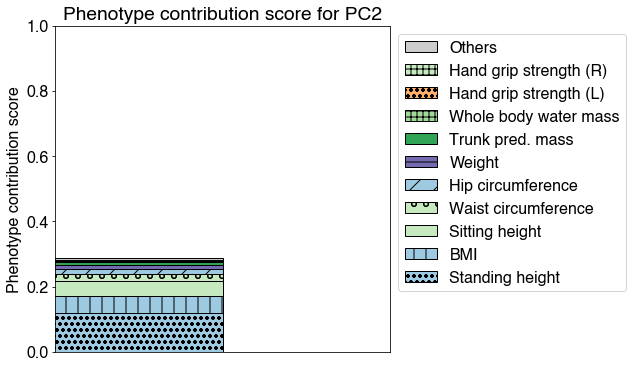

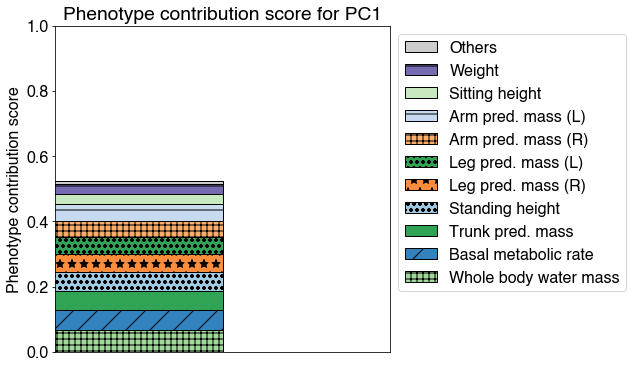

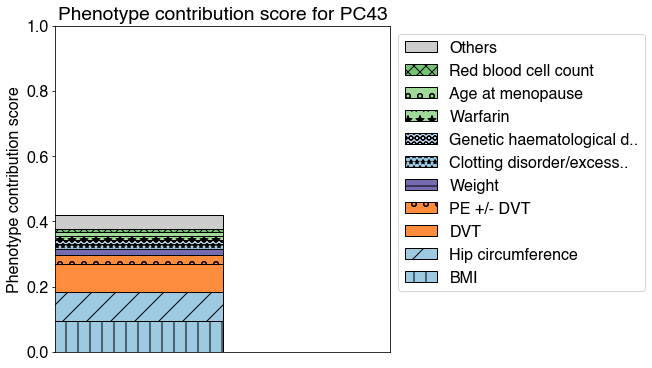

In [13]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_BMI, 
    out_dir, 
    fig_title = 'figS7', 
    d = d_coding, 
    topk = 3, 
    phe_gs=phe_gs,
    topk_in_pc=10,
)

2018-05-15 14:04:00,245 plot_contribution DEBUG    /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_legend_MI_1_PC61
2018-05-15 14:04:00,428 plot_contribution DEBUG    Angina	angina
2018-05-15 14:04:00,431 plot_contribution DEBUG    # of medications taken	Number of treatments/medications taken
2018-05-15 14:04:00,434 plot_contribution DEBUG    Heart attack (MI)	heart attack/myocardial infarction
2018-05-15 14:04:00,436 plot_contribution DEBUG    PEF	Peak expiratory flow (PEF)
2018-05-15 14:04:00,443 plot_contribution DEBUG    Childhood sunburn	Childhood sunburn occasions
2018-05-15 14:04:00,445 plot_contribution DEBUG    Outdoor time, summer	Time spend outdoors in summer
2018-05-15 14:04:00,447 plot_contribution DEBUG    Others	others
2018-05-15 14:04:00,451 plot_contribution INFO     saving to /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_legend_MI_1_PC61.png
2018-05-15 14:04:00,740 plot_contribution INFO     saving to /Users/yosuke/repos

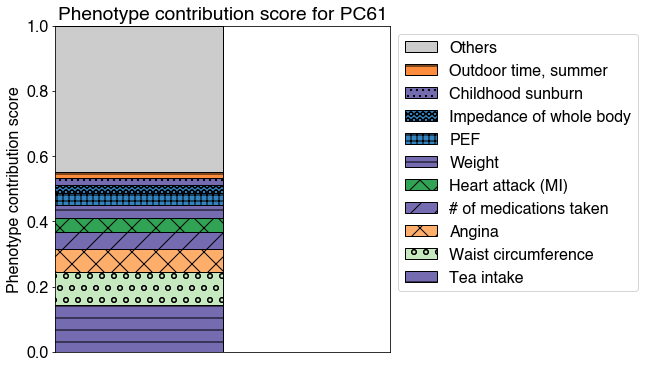

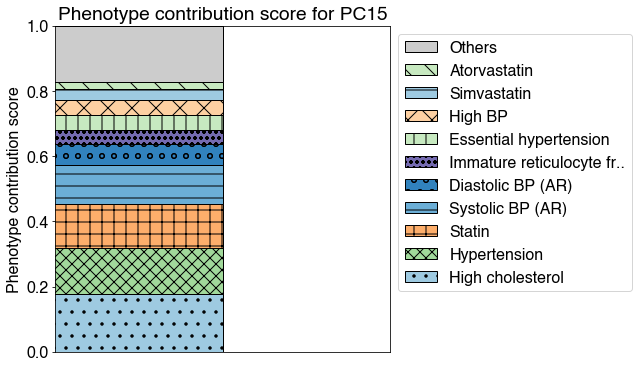

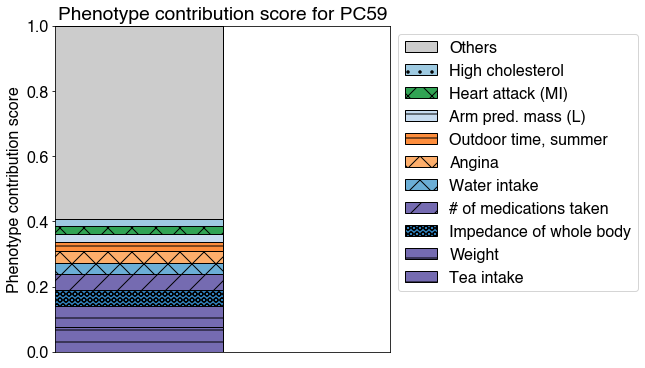

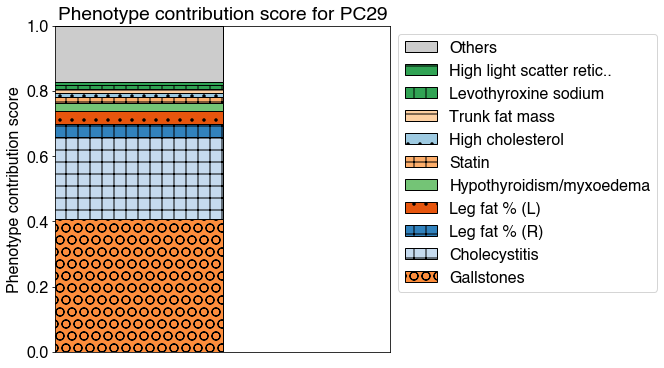

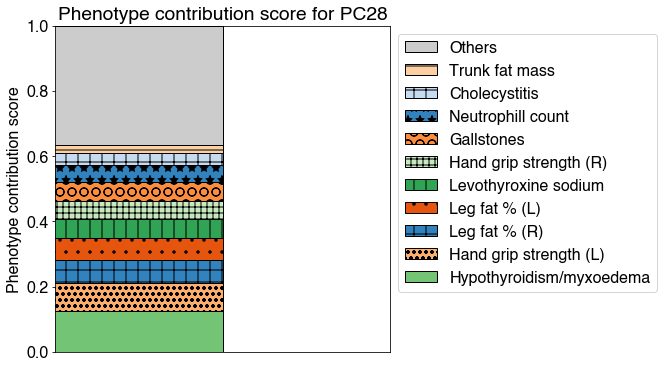

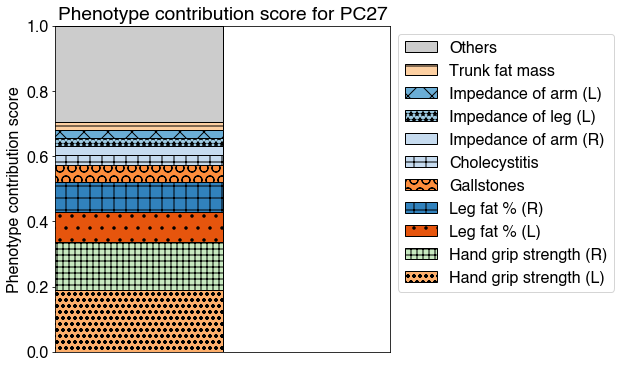

In [17]:
decomposition.plot_contribution_legend_phe_batch_fig(
    labels_dict_MI_gallstones, 
    out_dir, 
    fig_title = 'figS7', 
    d = d_coding, 
    topk = 3, 
    topk_in_pc=10,
)

2018-05-15 14:03:43,987 plot_contribution INFO     fat: 0.5519; spirometry: 0.0837; impedance: 0.0308; reticulocyte: 0.0117; fat-free: 0.0095
2018-05-15 14:03:44,115 plot_contribution INFO     fat-free: 0.3325; fat: 0.0447; impedance: 0.0329; spirometry: 0.0195
2018-05-15 14:03:44,217 plot_contribution INFO     spirometry: 0.2380; fat: 0.2220; impedance: 0.0070
2018-05-15 14:03:44,312 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_BMI.pdf
2018-05-15 14:03:45,522 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_BMI.png


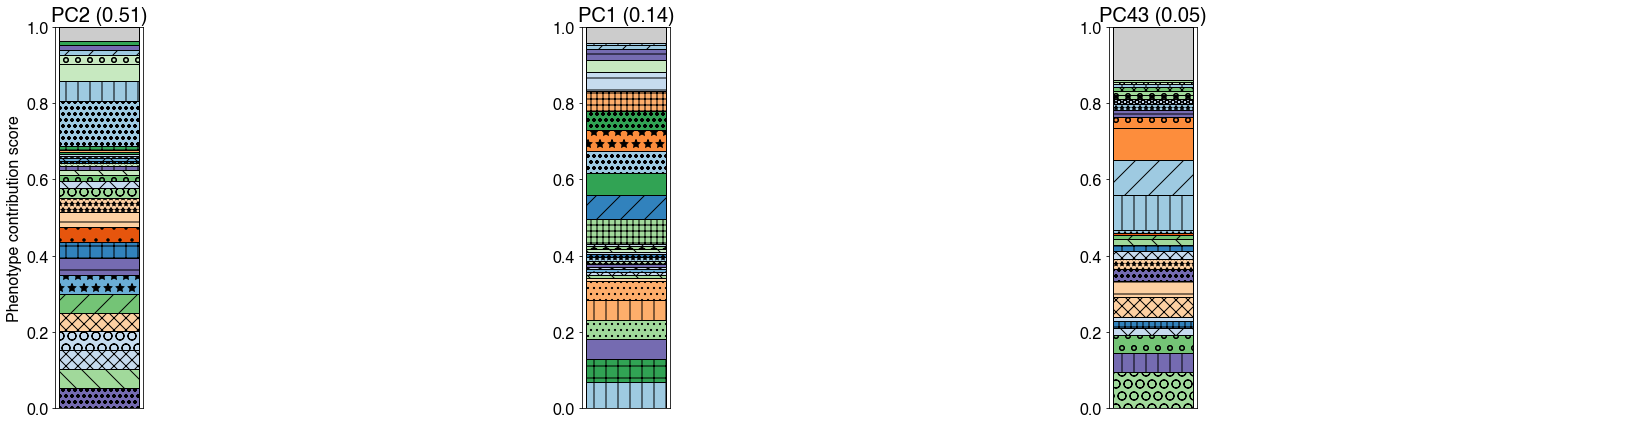

In [16]:
decomposition.plot_contribution_and_save(
    d = d_coding, 
    phe_or_gene = 'phe', 
    labels = labels_dict_BMI.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS7_BMI', 
    fig_spacing = 5, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    phe_gs=phe_gs,    
    figsize=(28,7),
)

2018-05-15 14:07:09,354 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_MI_gallstones.pdf
2018-05-15 14:07:12,321 root         INFO     /Users/yosuke/repos/rivas-lab/decomposition/figs/FigS7_CodingPhe/figS7_MI_gallstones.png


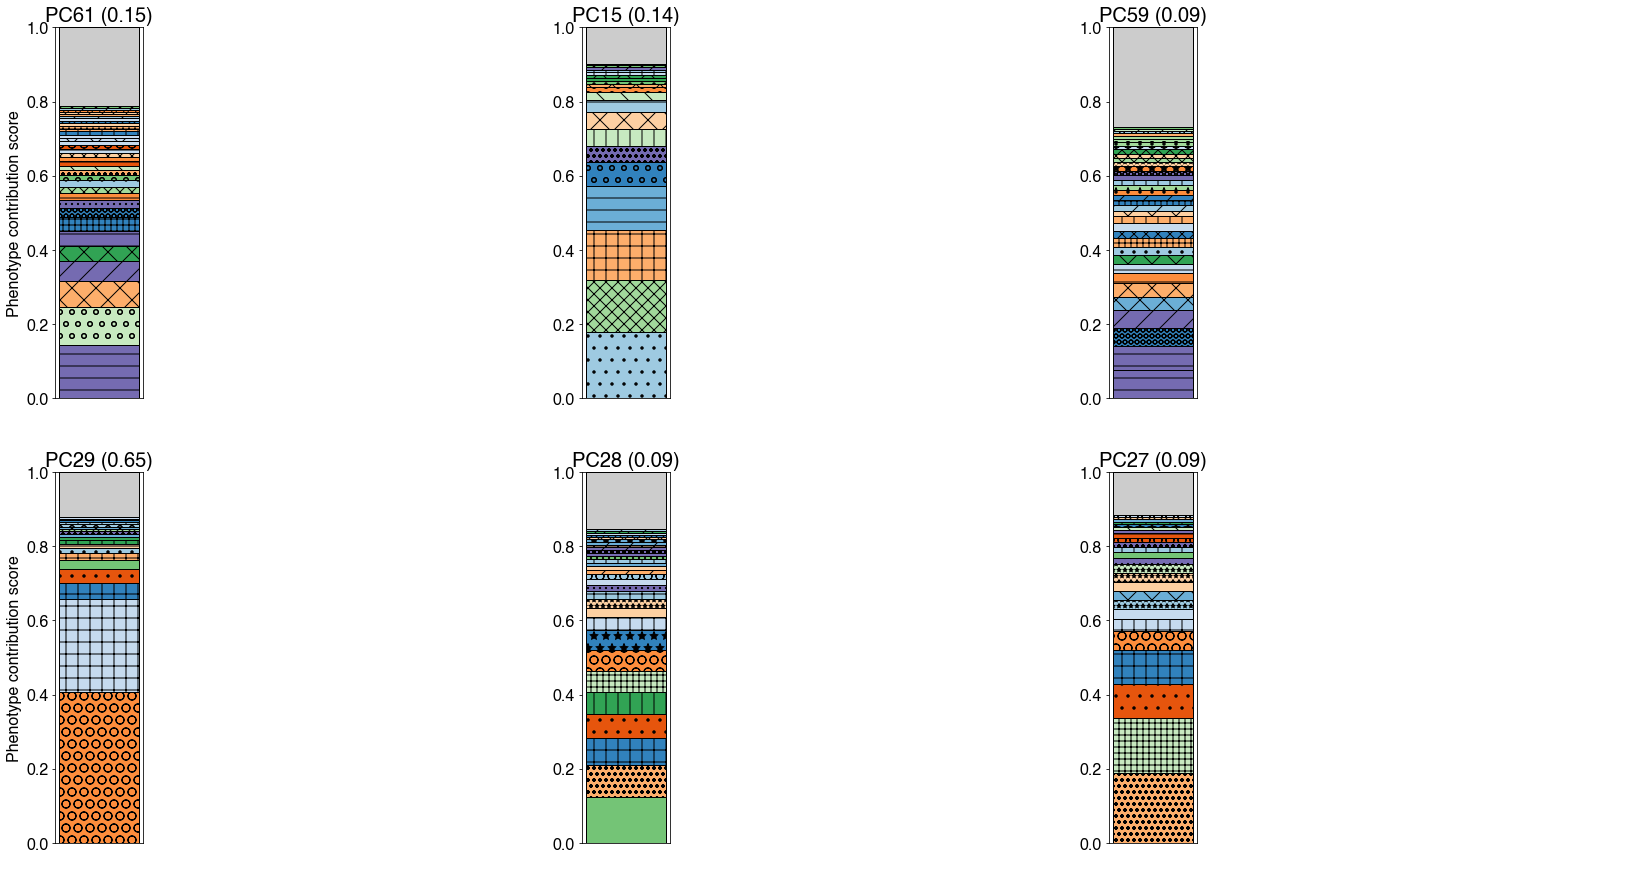

In [18]:
decomposition.plot_contribution_and_save(
    d = d_coding, 
    phe_or_gene = 'phe', 
    labels = labels_dict_MI_gallstones.keys(), 
    topk = 3, 
    out_dir = out_dir, 
    fig_title = 'figS7_MI_gallstones', 
    fig_spacing = 5, 
    contribution_thr=0.005, 
    pc_y_max = 1, 
    figsize=(28,15),
)